In [54]:
from IPython.display import Image
from importlib import reload
from formlang import nfa, dfa
import graphics

# Полный детерминированный конечный автомат и минимальный ПДКА
Клячин Артемий, Б05-026

## Задание:
По имеющемуся НКА построить ПДКА и минимальный ПДКА

Будем работать с НКА, построенным в предыдущем задании, порождённый регулярным выражением в обратной польской записи: 
```
11.1+ab11.+1+*c..+*
```

Для работы с ДКА разработан класс DFA.
Построенный НКА из предыдущего задания может быть преобразован в экземпляр класс DNA методом NFA.createDFA.
Проверяем, что граф выглядит также, как в предыдущем задании:

DFA(Q:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] A:['a', 'b', 'c'] T:[[{1, 4}, {2}, set()], [set(), set(), {3}], [set(), set(), {3}], [{1, 4}, {2}, set()], [{8}, {5, 7}, set()], [{6}, set(), set()], [{8}, {5, 7}, set()], [{1, 4}, {2}, set()], [set(), set(), {9}], [{1, 4}, {2}, set()]] S:{0} F:{0, 9, 3, 7})


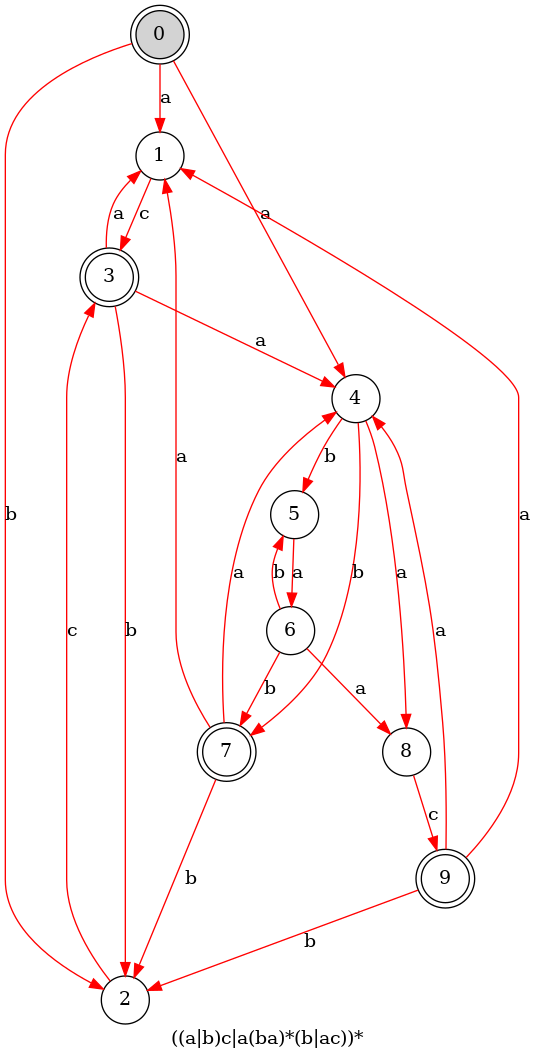

In [50]:
reload(nfa)
reload(dfa)
reload(graphics)
g = nfa.parseRPN("ab+c.aba.*.bac.+.+*")
regex = g.regex()
g.condensate()
g.removeEpsilonEdges()
g.removeUnreachableEdges()
g.compact()
dfa1 = g.createDFA()
print(dfa1)
Image(graphics.dfaCreateImage(dfa1, regex))

Для того чтобы получить детерминированный конечный автомат нужно вызвать метод determinate:

DFA(Q:[0, 1, 2, 3, 4, 5, 6, 7] A:['a', 'b', 'c'] T:[[{1}, {2}, set()], [{3}, {4}, {5}], [set(), set(), {5}], [set(), set(), {6}], [{7}, {2}, set()], [{1}, {2}, set()], [{1}, {2}, set()], [{3}, {4}, {5}]] S:{0} F:{0, 4, 5, 6})


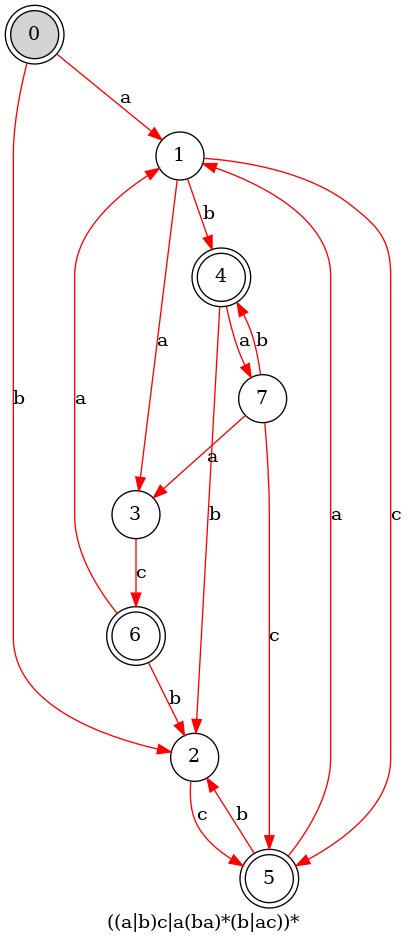

In [ ]:
dfa2 = dfa1.determinate()
print(dfa2)
Image(graphics.dfaCreateImage(dfa2, regex))

Для того чтобы получить полный детерминированный конечный автомат нужно вызвать дополнительно метод complete:

DFA(Q:[0, 1, 2, 3, 4, 5, 6, 7, 8] A:['a', 'b', 'c'] T:[[{1}, {2}, {8}], [{3}, {4}, {5}], [{8}, {8}, {5}], [{8}, {8}, {6}], [{7}, {2}, {8}], [{1}, {2}, {8}], [{1}, {2}, {8}], [{3}, {4}, {5}], [{8}, {8}, {8}]] S:{0} F:{0, 4, 5, 6})


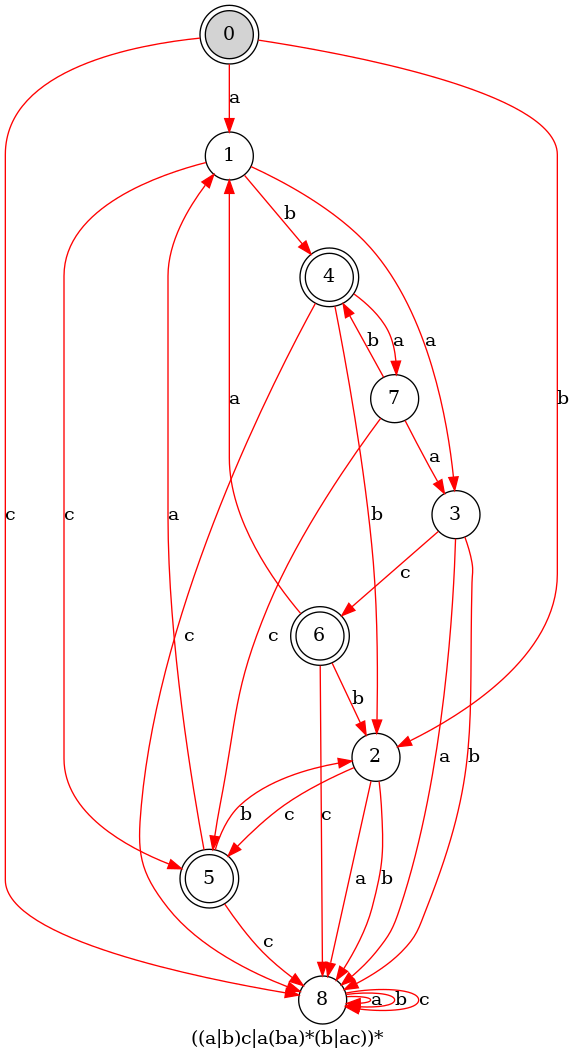

In [51]:
dfa2 = dfa1.determinate().complete()
print(dfa2)
Image(graphics.dfaCreateImage(dfa2, regex))

Для построения минимильного ДКА воспользуется алгоритмом Бржозовского (Janusz A. (John) Brzozowski). Brzozowski (J.A.). - Canonical regular expressions and minimal state graphs for definite events, “Mathematical theory of automata”, New York, 1962.
Алгоритм можно записать в виде формулы
```
MDFA = determinate(reverse(determinate(reverse(DFA)))),
```
где NFA это исходный HКА, reverse это процедура обращения НКА,  determinate это процедура детерминизации КА,  MDFA это миниммальный ДКА.

Первый шаг алгоритма (обращение):

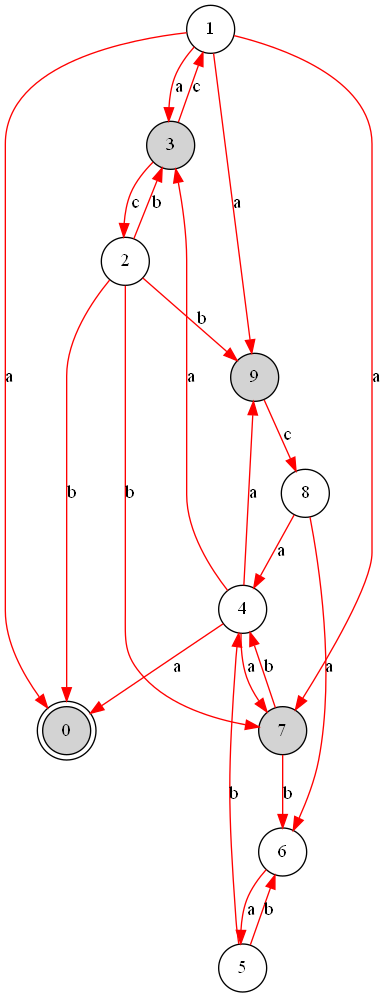

In [31]:
dfa2 = dfa1.reverse()
Image(graphics.dfaCreateImage(dfa2))

Второй шаг алгоритма (детерминизация):

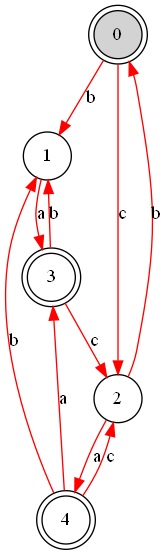

In [32]:
dfa2 = dfa1.reverse().determinate()
Image(graphics.dfaCreateImage(dfa2))

Третий шал алгоритма (обращение):

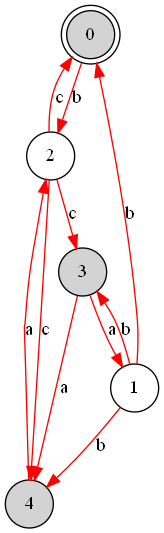

In [33]:
dfa2 = dfa1.reverse().determinate().reverse()
Image(graphics.dfaCreateImage(dfa2))

Последний шаг алгоритма (детерминизация):

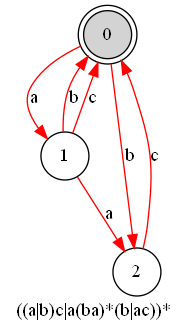

In [34]:
dfa2 = dfa1.minimize()
Image(graphics.dfaCreateImage(dfa2, regex))

Минимальный полный детерминированный конечный автомат:

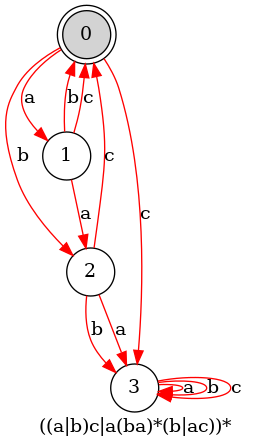

In [52]:
dfa2 = dfa1.minimize().complete()
Image(graphics.dfaCreateImage(dfa2, regex))

Проверка покрытия тестами при помощи пакетов pytest и pytest-cov.

In [55]:
!pytest --cov=formlang tests

============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-6.2.5, py-1.10.0, pluggy-1.0.0
rootdir: /home/art/Python/dfa
plugins: cov-3.0.0, anyio-3.3.4
collected 8 items                                                              

tests/test_dfa.py .                                                      [ 12%]
tests/test_helpers.py ...                                                [ 50%]
tests/test_nfa.py ...                                                    [ 87%]
tests/test_prefix.py .                                                   [100%]

---------- coverage: platform linux, python 3.8.10-final-0 -----------
Name                   Stmts   Miss  Cover
------------------------------------------
formlang/__init__.py       0      0   100%
formlang/dfa.py           59      2    97%
formlang/helpers.py       58      0   100%
formlang/nfa.py          160      3    98%
formlang/prefix.py        22      0   100%
------------